In [38]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import math

In [39]:
f = uproot.open("straighttracks-mc-22m-area00-slice1cm2.root")
idarray= np.float64(f["ntuple"]["id"].array())
xarray= np.float64(f["ntuple"]["x"].array())
yarray= np.float64(f["ntuple"]["y"].array())
zarray= np.float64(f["ntuple"]["z"].array())
txarray= np.float64(f["ntuple"]["tx"].array())
tyarray= np.float64(f["ntuple"]["ty"].array())
izarray= np.float64(f["ntuple"]["iz"].array())
trkidarray= np.float64(f["ntuple"]["trkid"].array())
ibtarray= np.float64(f["ntuple"]["ibt"].array())
nbtsarray= np.float64(f["ntuple"]["nbts"].array())
dataarr=np.array((xarray,yarray,zarray,txarray,tyarray,izarray,idarray,nbtsarray,trkidarray,ibtarray)).T

In [40]:
muonarr=dataarr[dataarr[:,6]==13]
otherarr=dataarr[dataarr[:,6]!=13]

In [41]:
# Determine seed ? track
izmin=np.amin(dataarr[:,5]) # iz of first layer
dataseed=[]
for i in range(len(dataarr)):
    if(dataarr[i][9]==0): # ibtarray==0 : gets seed track, and tracks at layer 72
        dataseed.append(1)
    else:
        dataseed.append(0)
dataseed=np.array(dataseed).T 
print(dataseed.shape)  # An array of 0s and 1s; 1 means that the muon ST is a seed

(4896056,)


In [42]:
len(dataseed[dataseed[:]==1])

291279

In [43]:
data_seedarr=dataarr[dataseed[:]==1]
data_nseedarr=dataarr[dataseed[:]==0]

In [44]:
print(len(data_seedarr))
print(len(data_nseedarr))

291279
4604777


In [45]:
len(data_seedarr[data_seedarr[:,5]==72])/len(data_seedarr)

0.5535517493537124

In [46]:
nseeds=data_nseedarr[:,8] # the trackid array of nseeds
seeds=data_seedarr[:,8] # the trackid array of seeds

In [47]:
index = np.argsort(data_seedarr,axis=0)
index8=index[:,8]
sorted_data_seedarr = data_seedarr[index8]
sorted_data_seedarr

array([[-4.76792109e+04, -4.44842266e+04, -1.75500000e+04, ...,
         2.90000000e+01,  0.00000000e+00,  0.00000000e+00],
       [-4.83871055e+04, -4.49957500e+04,  1.95000000e+03, ...,
         1.40000000e+01,  1.00000000e+00,  0.00000000e+00],
       [-4.76883320e+04, -3.80970430e+04, -1.75500000e+04, ...,
         2.90000000e+01,  2.00000000e+00,  0.00000000e+00],
       ...,
       [-5.04735508e+04, -3.87578477e+04, -1.75500000e+04, ...,
         2.80000000e+01,  2.91276000e+05,  0.00000000e+00],
       [-5.06859453e+04, -3.88501211e+04, -1.75500000e+04, ...,
         2.60000000e+01,  2.91277000e+05,  0.00000000e+00],
       [-5.07777500e+04, -3.87267656e+04, -1.75500000e+04, ...,
         2.80000000e+01,  2.91278000e+05,  0.00000000e+00]])

In [48]:
sorted_index = np.searchsorted(sorted_data_seedarr[:,8], data_nseedarr[:,8])
sorted_index

array([     0,      0,      0, ..., 291278, 291278, 291278], dtype=int64)

In [49]:
data_nseedindex = np.take(index8, sorted_index, mode="clip")
data_nseedindex

array([     0,      0,      0, ..., 291278, 291278, 291278], dtype=int64)

In [50]:
mask = seeds[data_nseedindex] != data_nseedarr[:,8]

In [51]:
mask

array([False, False, False, ..., False, False, False])

In [52]:
result = np.ma.array(data_nseedindex, mask=mask)
print(result) #This is the array that gives mu_nseedarr's corresponding seed track index in mu_seedarr.

[0 0 0 ... 291278 291278 291278]


In [53]:
# check validity of result
print(data_nseedarr[0,8],data_nseedarr[-1,8])
print(data_seedarr[0,8],data_seedarr[-1,8]) # these values should be the same

0.0 291278.0
0.0 291278.0


In [54]:
sum(mask) #count number of Falses: number of tracks in data_nseedarr that do not have corresponding trackid in data_seedarr

0

In [55]:
# adjust data_nseedarray to only include those with corresponding trackid in data_seedarr:
data_nseedarr=data_nseedarr[mask==False]

In [56]:
result=result[mask==False]

In [57]:
data_seedarr[result[0]][0]

-47679.2109375

In [58]:
# All Data IP as an array:
data_IParr=[]
for i in range(len(data_nseedarr)):
    data_IParr.append(math.sqrt((data_nseedarr[i][0]-(data_nseedarr[i][2]-data_seedarr[result[i]][2])*data_nseedarr[i][3]-data_seedarr[result[i]][0])**2+(data_nseedarr[i][1]-(data_nseedarr[i][2]-data_seedarr[result[i]][2])*data_nseedarr[i][4]-data_seedarr[result[i]][1])**2))
data_IParr=np.array(data_IParr)

(array([4.29383e+06, 1.60848e+05, 7.06120e+04, 3.43670e+04, 1.67280e+04,
        9.71800e+03, 5.75900e+03, 4.01900e+03, 2.52400e+03, 1.74400e+03,
        1.11400e+03, 8.43000e+02, 6.42000e+02, 4.53000e+02, 3.72000e+02,
        2.59000e+02, 1.97000e+02, 1.26000e+02, 1.41000e+02, 1.03000e+02,
        7.60000e+01, 6.90000e+01, 4.10000e+01, 3.70000e+01, 2.50000e+01,
        2.70000e+01, 2.10000e+01, 1.90000e+01, 1.00000e+01, 1.40000e+01,
        9.00000e+00, 6.00000e+00, 3.00000e+00, 2.00000e+00, 4.00000e+00,
        7.00000e+00, 3.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([1.91613232e-06, 4.00632227e+01, 8.01264435e+01, 1.20189664e+02,
        1.60252885e+02, 2.00316106e+02, 2.40379327e+02, 2.80442548e+02,
        3.20505768e+02, 3.60568989e+02, 4.00632210e+02, 4.40695431e+02,
        4.80758652e+02, 5.20821872e+02, 5.60885093e+

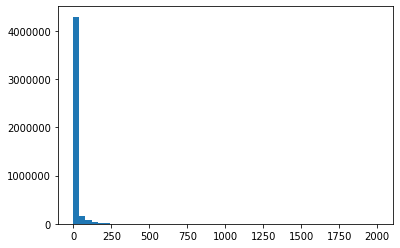

In [59]:
plt.hist(data_IParr,bins=50)

In [60]:
np.mean(data_IParr)

11.30285865201906

In [61]:
IP_cutarr=data_nseedarr[data_IParr<=8]
len(IP_cutarr)

3536581

In [62]:
len(data_nseedarr)

4604777

In [63]:
print('number of muons in data_seedarr',len(data_seedarr[data_seedarr[:,6]==13]))
print('number of other particles in data_seedarr',len(data_seedarr[data_seedarr[:,6]!=13]))

number of muons in data_seedarr 103905
number of other particles in data_seedarr 187374


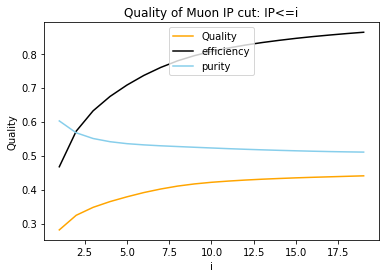

In [64]:
Qual_arr=[]
eff_arr=[]
pur_arr=[]
i_arr=[]

for i in range(1,20):

    cut_IP=data_nseedarr[data_IParr<=i]

    muon=cut_IP[cut_IP[:,6]==13]
    other=cut_IP[cut_IP[:,6]!=13]

    TP=muon.size
    FP=other.size
    FN=muonarr.size-TP

    eff=TP/(TP+FN)
    pur=TP/(TP+FP)
    Qual=eff*pur
    eff_arr.append(eff)
    pur_arr.append(pur)
    i_arr.append(i)
    Qual_arr.append(Qual)

plt.title("Quality of Muon IP cut: IP<=i")
plt.xlabel("i")
plt.ylabel("Quality")
plt.plot(i_arr,Qual_arr,label='Quality',color="orange")
plt.plot(i_arr,eff_arr,label='efficiency',color="black")
plt.plot(i_arr,pur_arr,label='purity',color="skyblue")
plt.legend(loc='upper center')

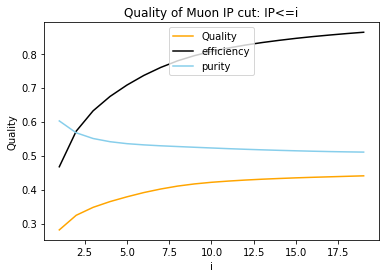

In [65]:
Qual_arr=[]
eff_arr=[]
pur_arr=[]
i_arr=[]

for i in range(1,20):

    cut_IP=data_nseedarr[data_IParr<=i]
    np.append(cut_IP,data_seedarr) # Add the seeds back in for whole data analysis
    
    muon=cut_IP[cut_IP[:,6]==13]
    other=cut_IP[cut_IP[:,6]!=13]

    TP=muon.size
    FP=other.size
    FN=muonarr.size-TP

    eff=TP/(TP+FN)
    pur=TP/(TP+FP)
    Qual=eff*pur
    eff_arr.append(eff)
    pur_arr.append(pur)
    i_arr.append(i)
    Qual_arr.append(Qual)

plt.title("Quality of Muon IP cut: IP<=i")
plt.xlabel("i")
plt.ylabel("Quality")
plt.plot(i_arr,Qual_arr,label='Quality',color="orange")
plt.plot(i_arr,eff_arr,label='efficiency',color="black")
plt.plot(i_arr,pur_arr,label='purity',color="skyblue")
plt.legend(loc='upper center')